# Environment Setup

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from itertools import repeat


# Data Loading

In [2]:
_df = pd.read_csv("./input/dummy_df.csv", index_col=0)
_df

year  artist.inverted                     track  time date.entered  \
0     2000  Destiny's Child  Independent Women Part I  3:38   2000-09-23   
317   2000  Destiny's Child  Independent Women Part I  3:38   2000-09-23   
634   2000  Destiny's Child  Independent Women Part I  3:38   2000-09-23   
951   2000  Destiny's Child  Independent Women Part I  3:38   2000-09-23   
1268  2000  Destiny's Child  Independent Women Part I  3:38   2000-09-23   
...    ...              ...                       ...   ...          ...   
314   2000    Zombie Nation             Kernkraft 400  3:30   2000-09-02   
631   2000    Zombie Nation             Kernkraft 400  3:30   2000-09-02   
315   2000    The Eastsidaz                  Got Beef  3:58   2000-07-01   
632   2000    The Eastsidaz                  Got Beef  3:58   2000-07-01   
316   2000           Fragma            Toca's Miracle  3:22   2000-10-28   

     date.peaked  week  rank  gap_week  total_time_s  ...  \
0     2000-11-18     1    78     False           218  ...   
317   2000-11-18     2    63     False           218  ...   
634   2000-11-18     3    49     False           218  ...   
951   2000-11-18     4    33     False           218  ...   
1268  2000-11-18     5    23     False           218  ...   
...          ...   ...   ...       ...           ...  ...   
314   2000-09-02     1    99     False           210  ...   
631   2000-09-02     2    99     False           210  ...   
315   2000-07-01     1    99     False           238  ...   
632   2000-07-01     2    99     False           238  ...   
316   2000-10-28     1    99     False           202  ...   

      date.peaked.quarter  genre_Electronica  genre_Gospel  genre_Jazz  \
0                       4                  0             0           0   
317                     4                  0             0           0   
634                     4                  0             0           0   
951                     4                  0             0           0   
1268                    4                  0             0           0   
...                   ...                ...           ...         ...   
314                     3                  0             0           0   
631                     3                  0             0           0   
315                     3                  0             0           0   
632                     3                  0             0           0   
316                     4                  0             0           0   

      genre_Latin  genre_Pop  genre_R&B  genre_Rap  genre_Reggae  genre_Rock  
0               0          0          0          0             0           1  
317             0          0          0          0             0           1  
634             0          0          0          0             0           1  
951             0          0          0          0             0           1  
1268            0          0          0          0             0           1  
...           ...        ...        ...        ...           ...         ...  
314             0          0          0          0             0           1  
631             0          0          0          0             0           1  
315             0          0          0          1             0           0  
632             0          0          0          1             0           0  
316             0          0          1          0             0           0  

[5308 rows x 27 columns]

In [3]:
_df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'date.entered',
       'date.peaked', 'week', 'rank', 'gap_week', 'total_time_s',
       'date.entered.year', 'date.entered.month', 'date.entered.day',
       'date.entered.quarter', 'date.peaked.year', 'date.peaked.month',
       'date.peaked.day', 'date.peaked.quarter', 'genre_Electronica',
       'genre_Gospel', 'genre_Jazz', 'genre_Latin', 'genre_Pop', 'genre_R&B',
       'genre_Rap', 'genre_Reggae', 'genre_Rock'],
      dtype='object')

# Supervised Learning - Linear Regression

## Outliers

In [4]:
reg_df = _df[['total_time_s', 'rank']]
reg_df

total_time_s  rank
0              218    78
317            218    63
634            218    49
951            218    33
1268           218    23
...            ...   ...
314            210    99
631            210    99
315            238    99
632            238    99
316            202    99

[5308 rows x 2 columns]

<Axes: >

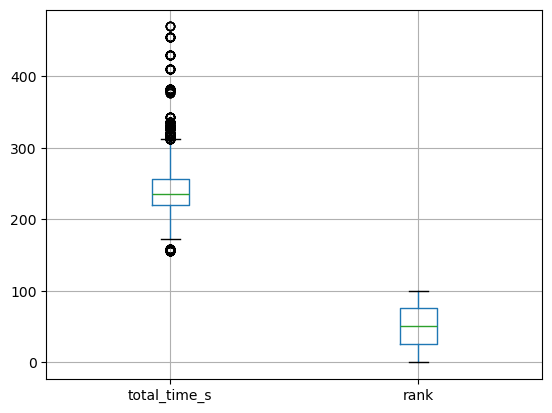

In [5]:
reg_df.boxplot()

In [6]:
_25p = reg_df['total_time_s'].quantile(.25)
_75p = reg_df['total_time_s'].quantile(.75)
_iqr = _75p - _25p
_out_range = 1.5 * _iqr

In [7]:
print( _25p, _75p, _iqr, _out_range)

220.0 257.0 37.0 55.5


In [8]:
_bottom_limit = _25p - _out_range
_top_limit = _75p + _out_range
print (_bottom_limit, _top_limit)

164.5 312.5


In [9]:
out_reg_df = reg_df[(reg_df['total_time_s']<=_top_limit) & (reg_df['total_time_s']>=_bottom_limit)]

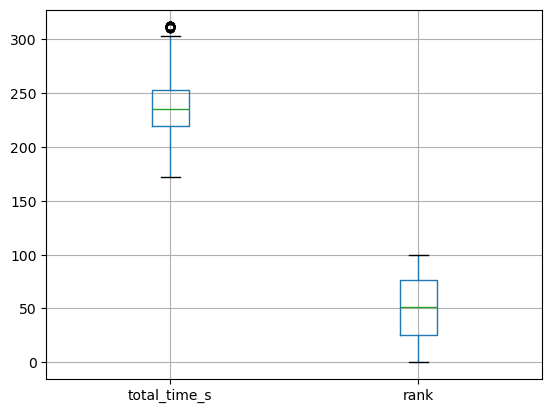

In [10]:
out_reg_df.boxplot()
plt.show()

## Features and Target Split

In [11]:
X = out_reg_df.drop(columns=['rank'])
y = out_reg_df[['rank']]

## Scaling

### Features

In [12]:
from sklearn.preprocessing import StandardScaler

features_standard_scaler = StandardScaler().fit(X).set_output(transform='pandas')
features_scale_df = features_standard_scaler.transform(X)
features_scale_df

total_time_s
0        -0.644739
317      -0.644739
634      -0.644739
951      -0.644739
1268     -0.644739
...            ...
314      -0.941175
631      -0.941175
315       0.096351
632       0.096351
316      -1.237611

[4948 rows x 1 columns]

### Target

In [13]:
target_standard_scaler = StandardScaler().fit(y).set_output(transform='pandas')
target_scale_df = target_standard_scaler.transform(y)
target_scale_df

rank
0     0.932877
317   0.421702
634  -0.055395
951  -0.600648
1268 -0.941431
...        ...
314   1.648522
631   1.648522
315   1.648522
632   1.648522
316   1.648522

[4948 rows x 1 columns]

## Train-Test-Split

In [14]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(features_scale_df, target_scale_df, train_size=0.8, test_size=0.2)

In [15]:
X_train

total_time_s
222        0.170460
5085      -0.125976
2561       0.355732
1034      -0.459467
1059       0.726277
...             ...
3751      -0.570630
4907      -0.274194
14923     -0.088922
174        1.689694
1183       0.837441

[3958 rows x 1 columns]

In [16]:
y_train

rank
222    1.001034
5085  -0.191708
2561  -1.282215
1034  -0.362100
1059   0.660251
...         ...
3751   1.375896
4907   0.694329
14923 -0.907353
174    0.183154
1183   1.478131

[3958 rows x 1 columns]

In [17]:
X_test

total_time_s
2557     -0.200085
849      -0.014813
199      -1.348775
3617     -0.422412
2891      0.022242
...            ...
4279     -2.312192
1008     -0.200085
1882      0.689223
938      -0.422412
652      -0.200085

[990 rows x 1 columns]

In [18]:
y_test

rank
2557 -1.214058
849   0.387624
199   0.830642
3617 -0.566570
2891 -1.554841
...        ...
4279  0.626172
1008 -0.839196
1882  1.478131
938   1.546287
652   0.046840

[990 rows x 1 columns]

## Model Execution

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [20]:
_pred = reg.predict(X_test)

In [21]:
_pred

array([[0.0020865 ],
       [0.0019738 ],
       [0.00278523],
       [0.00222173],
       [0.00195126],
       [0.0016357 ],
       [0.00219919],
       [0.00147792],
       [0.00170332],
       [0.00246967],
       [0.0019738 ],
       [0.00091443],
       [0.00278523],
       [0.00253729],
       [0.00122999],
       [0.00183856],
       [0.00150046],
       [0.00237951],
       [0.00199634],
       [0.00150046],
       [0.00264999],
       [0.00170332],
       [0.00177094],
       [0.00161316],
       [0.00204142],
       [0.00253729],
       [0.00154554],
       [0.0019738 ],
       [0.00237951],
       [0.00145538],
       [0.001523  ],
       [0.00154554],
       [0.00283031],
       [0.00118491],
       [0.0016357 ],
       [0.00156808],
       [0.00206396],
       [0.00253729],
       [0.00118491],
       [0.00206396],
       [0.00172586],
       [0.00201888],
       [0.00264999],
       [0.0017484 ],
       [0.00134268],
       [0.00177094],
       [0.00192872],
       [0.001

In [22]:
reg.coef_

array([[-0.00060829]])

In [23]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [24]:
reg.score(X_test, y_test)

-5.935257092604118e-05

### Performance Checking

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, _pred)

1.0300445584216864

In [26]:
np.sqrt(mean_squared_error(y_test, _pred))

1.0149111086305471

In [27]:
from sklearn.metrics import r2_score

r2_score(y_test, _pred)

-5.935257092604118e-05

In [28]:
target_pred_df = target_standard_scaler.inverse_transform(_pred)
target_test_df = target_standard_scaler.inverse_transform(y_test)

In [29]:
target_pred_df

array([[50.68673169],
       [50.68342465],
       [50.70723535],
       [50.69070014],
       [50.68276324],
       [50.67350352],
       [50.69003873],
       [50.66887366],
       [50.67548775],
       [50.69797564],
       [50.68342465],
       [50.65233845],
       [50.70723535],
       [50.69995986],
       [50.66159817],
       [50.6794562 ],
       [50.66953507],
       [50.69533   ],
       [50.68408606],
       [50.66953507],
       [50.7032669 ],
       [50.67548775],
       [50.67747197],
       [50.67284211],
       [50.68540887],
       [50.69995986],
       [50.67085789],
       [50.68342465],
       [50.69533   ],
       [50.66821225],
       [50.67019648],
       [50.67085789],
       [50.70855817],
       [50.66027535],
       [50.67350352],
       [50.6715193 ],
       [50.68607028],
       [50.69995986],
       [50.66027535],
       [50.68607028],
       [50.67614916],
       [50.68474747],
       [50.7032669 ],
       [50.67681056],
       [50.66490521],
       [50

In [30]:
np.sqrt(mean_squared_error(target_pred_df, target_test_df))

29.781708982187872

In [31]:
r2_score(target_pred_df, target_test_df)

-2592873.7271450935

# Supervised Learning - Classification: Logistic Regression

In [32]:
_df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'date.entered',
       'date.peaked', 'week', 'rank', 'gap_week', 'total_time_s',
       'date.entered.year', 'date.entered.month', 'date.entered.day',
       'date.entered.quarter', 'date.peaked.year', 'date.peaked.month',
       'date.peaked.day', 'date.peaked.quarter', 'genre_Electronica',
       'genre_Gospel', 'genre_Jazz', 'genre_Latin', 'genre_Pop', 'genre_R&B',
       'genre_Rap', 'genre_Reggae', 'genre_Rock'],
      dtype='object')

In [33]:
reg_df['genre_Rock'] = _df['genre_Rock'].copy()
reg_df = reg_df.drop(columns='rank').copy()
reg_df

/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_22363/1933982530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['genre_Rock'] = _df['genre_Rock'].copy()


total_time_s  genre_Rock
0              218           1
317            218           1
634            218           1
951            218           1
1268           218           1
...            ...         ...
314            210           1
631            210           1
315            238           0
632            238           0
316            202           0

[5308 rows x 2 columns]

## Outliers

In [34]:
out_logreg_df = reg_df[(reg_df['total_time_s']<=_top_limit) & (reg_df['total_time_s']>=_bottom_limit)]

In [35]:
out_logreg_df

total_time_s  genre_Rock
0              218           1
317            218           1
634            218           1
951            218           1
1268           218           1
...            ...         ...
314            210           1
631            210           1
315            238           0
632            238           0
316            202           0

[4948 rows x 2 columns]

## Label Distribution

In [36]:
out_logreg_df['genre_Rock'].value_counts()

genre_Rock
0    2527
1    2421
Name: count, dtype: int64

In [37]:
out_logreg_df['genre_Rock'].shape

(4948,)

In [38]:
out_logreg_df['total_time_s'].nunique()

105

### Resampling

#### Samples

##### Sample DataFrame

In [39]:
resampling_df_sample = pd.DataFrame()
resampling_df_sample['x1'] = np.random.randint(1, 200, 200)
resampling_df_sample['x2'] = np.random.randint(1, 200, 200)
repeat_list = list(repeat(1, 140))
repeat_list.extend(list(repeat(0, 60)))
resampling_df_sample['y'] = repeat_list
resampling_df_sample

x1   x2  y
0    103  159  1
1     10  110  1
2    105  113  1
3    102  171  1
4    150   11  1
..   ...  ... ..
195  121  178  0
196   78   65  0
197  149   47  0
198  197  169  0
199  169  137  0

[200 rows x 3 columns]

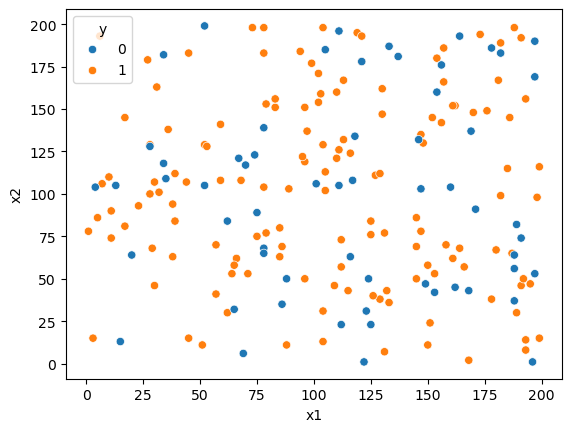

In [40]:
sns.scatterplot(resampling_df_sample, x="x1", y="x2", hue="y")
plt.show()

In [41]:
resampling_df_sample['y'].value_counts()

y
1    140
0     60
Name: count, dtype: int64

##### Bootstrap with Replacement

In [42]:
from sklearn.utils import resample
bootstrap_df_sample = resample(resampling_df_sample[resampling_df_sample['y']==0], replace=True, n_samples=140)
bootstrap_df_sample

x1   x2  y
141   52  199  0
159   75   89  0
193  156  176  0
182  196    1  0
178  197   53  0
..   ...  ... ..
145  111  196  0
143   13  105  0
157  146  132  0
191  125   23  0
182  196    1  0

[140 rows x 3 columns]

In [43]:
bootstrap_df_sample = pd.concat([bootstrap_df_sample, resampling_df_sample[resampling_df_sample['y']==1]])
bootstrap_df_sample

x1   x2  y
141   52  199  0
159   75   89  0
193  156  176  0
182  196    1  0
178  197   53  0
..   ...  ... ..
135   17   81  1
136    6  193  1
137  116  124  1
138   85   63  1
139  129  112  1

[280 rows x 3 columns]

In [44]:
bootstrap_df_sample['y'].value_counts()

y
0    140
1    140
Name: count, dtype: int64

In [45]:
bootstrap_df_sample['y'].value_counts()

y
0    140
1    140
Name: count, dtype: int64

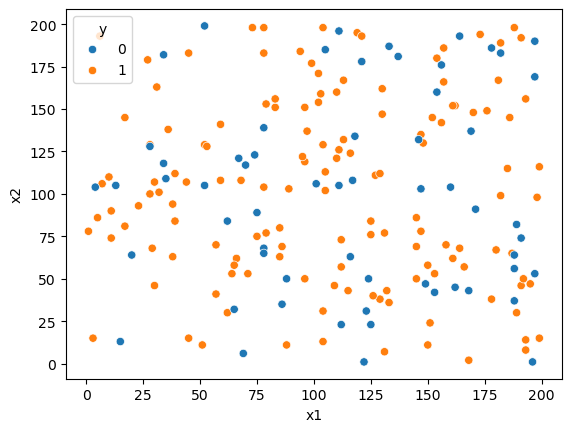

In [46]:
sns.scatterplot(resampling_df_sample, x="x1", y="x2", hue="y")
plt.show()

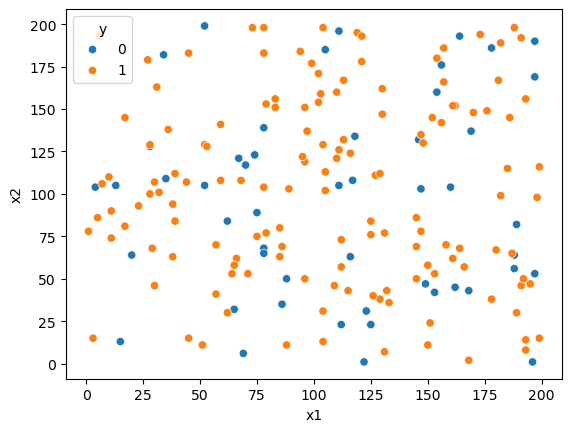

In [47]:
sns.scatterplot(bootstrap_df_sample, x="x1", y="x2", hue="y")
plt.show()

##### SMOTE

In [48]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE(random_state=1).fit_resample(X= resampling_df_sample[['x1', 'x2']], y=resampling_df_sample[['y']])


In [49]:
y.value_counts()

y
0    140
1    140
Name: count, dtype: int64

In [50]:
X.nunique()

x1    145
x2    149
dtype: int64

In [51]:
X

x1   x2
0    103  159
1     10  110
2    105  113
3    102  171
4    150   11
..   ...  ...
275  165  142
276  159  182
277   65   33
278  134  103
279  115  130

[280 rows x 2 columns]

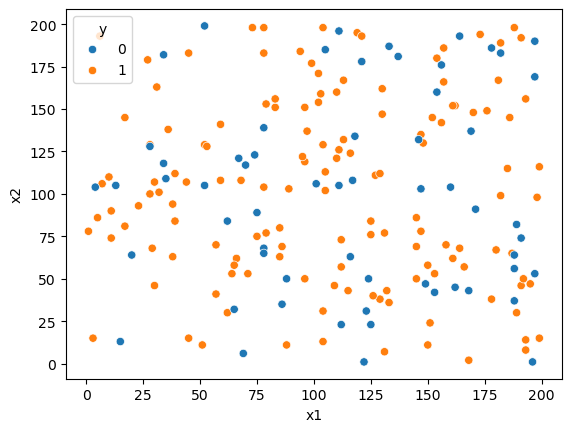

In [52]:
sns.scatterplot(resampling_df_sample, x="x1", y="x2", hue="y")
plt.show()

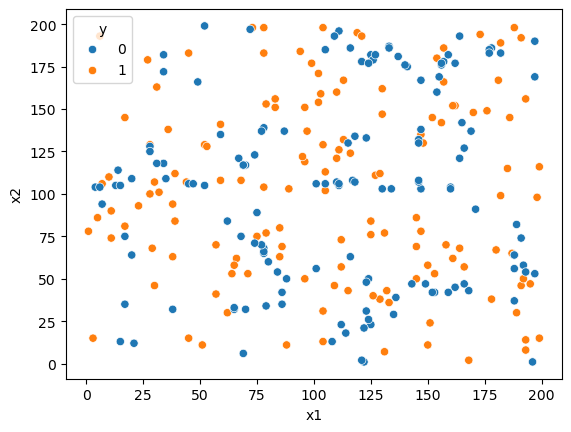

In [53]:
smote_df_sample = X.join(y)
sns.scatterplot(smote_df_sample, x="x1", y="x2", hue="y")
plt.show()

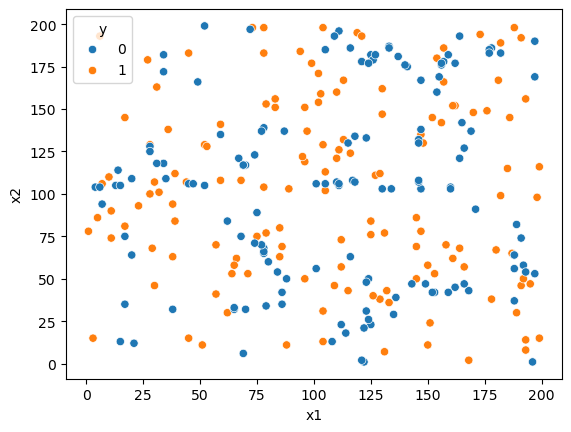

In [54]:
scat_df=X.join(y)
sns.scatterplot(scat_df, x='x1', y = 'x2', hue="y")
plt.show()

#### Actual
- Bootstrap Resampling with Replacement

In [55]:
from sklearn.utils import resample
resample_df = resample(out_logreg_df[out_logreg_df['genre_Rock']==1], replace=True, n_samples=2527)

In [56]:
resample_df['genre_Rock'].value_counts()

genre_Rock
1    2527
Name: count, dtype: int64

In [57]:
logreg_df = pd.concat([out_logreg_df[out_logreg_df['genre_Rock']!=1], resample_df])
logreg_df

total_time_s  genre_Rock
7              216           0
324            216           0
641            216           0
958            216           0
1275           216           0
...            ...         ...
4131           190           1
1878           242           1
9211           230           1
2233           243           1
3584           234           1

[5054 rows x 2 columns]

In [58]:
logreg_df['genre_Rock'].value_counts()


genre_Rock
0    2527
1    2527
Name: count, dtype: int64

In [59]:
logreg_df['total_time_s'].nunique()

105

## Train-Test-Split

In [60]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(logreg_df[['total_time_s']], logreg_df[['genre_Rock']], train_size=0.8, test_size=0.2)

In [61]:
X_train

total_time_s
3176           271
7628           261
4694           205
3658           252
768            231
...            ...
3656           228
3278           255
1168           199
378            286
1975           235

[4043 rows x 1 columns]

In [62]:
y_train

genre_Rock
3176           1
7628           1
4694           0
3658           1
768            0
...          ...
3656           0
3278           0
1168           0
378            0
1975           1

[4043 rows x 1 columns]

## Model Execution

In [63]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)


/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
logreg.coef_

array([[0.00945421]])

In [65]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
y_pred = logreg.predict(X_test)

### Performance Checking

In [67]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[286, 215],
       [259, 251]])

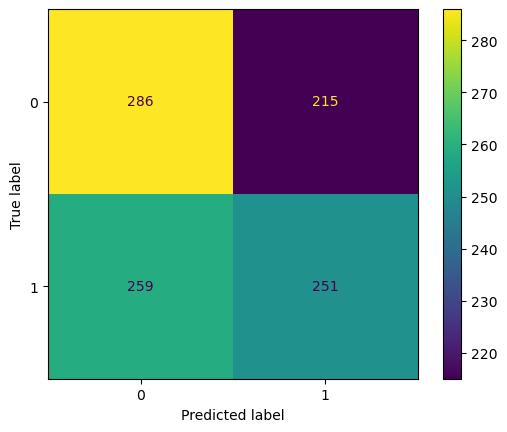

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display_logreg = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_logreg.plot()
plt.show()



In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)


    Accuracy:0.5311572700296736
    Precision:0.492156862745098
    Recall:0.5386266094420601
    F1:0.514344262295082



# Other Classification Techniques

## Naive-Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB().fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


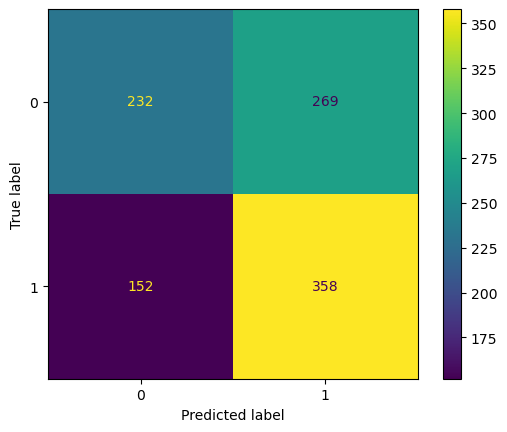


    Accuracy:0.5835806132542037
    Precision:0.7019607843137254
    Recall:0.5709728867623605
    F1:0.6297273526824978



In [71]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

## K-Nearest Neighbor

In [72]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = kn_clf.predict(X_test)

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


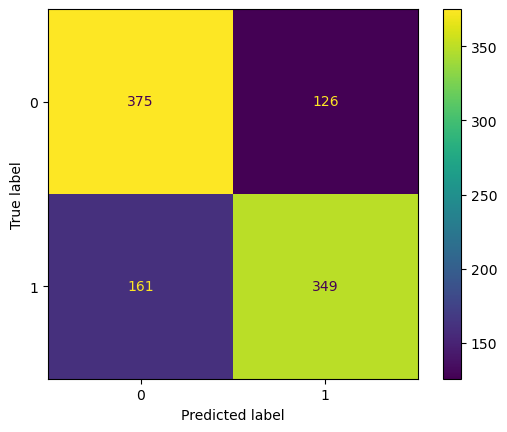


    Accuracy:0.7161226508407518
    Precision:0.6843137254901961
    Recall:0.7347368421052631
    F1:0.7086294416243655



In [73]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

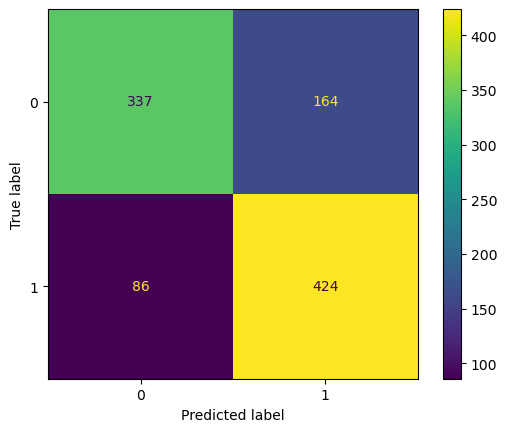


    Accuracy:0.7527200791295747
    Precision:0.8313725490196079
    Recall:0.7210884353741497
    F1:0.7723132969034608



In [75]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


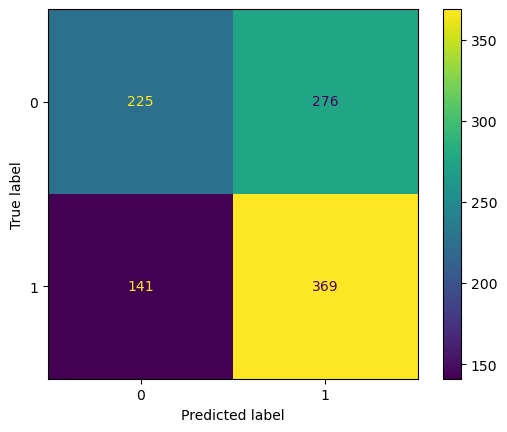


    Accuracy:0.5875370919881305
    Precision:0.7235294117647059
    Recall:0.5720930232558139
    F1:0.638961038961039



In [77]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

# Unsupervised Learning

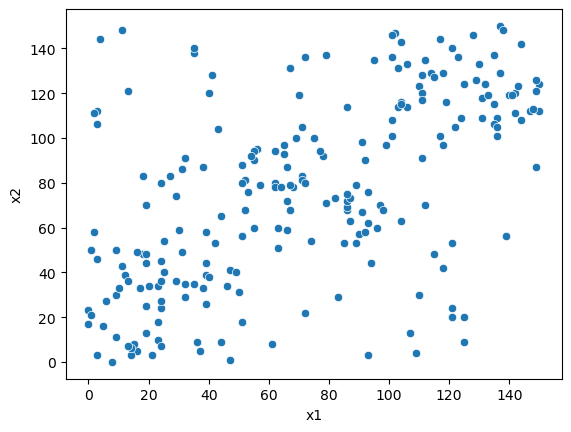

In [78]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()

np.random.seed(0)

for i in ['x1', 'x2']:
    df1[i] = np.random.randint(0,51,50)
    df2[i] = np.random.randint(51,101,50)
    df3[i] = np.random.randint(101,151,50)
    df4[i] = np.random.randint(0,151,75)

unsupervised_df = pd.concat([df1, df2, df3, df4])
sns.scatterplot(unsupervised_df, x='x1', y='x2')
plt.show()

## K-means Clustering

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results_df = pd.DataFrame()
sil_df = pd.DataFrame()

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(unsupervised_df[['x1', 'x2']])
    kmeans.inertia_
    result = [[i, round(kmeans.inertia_,0)]]
    results_df = pd.concat([results_df, pd.DataFrame(result, columns=['n', 'inertia'])])

    sil_result = silhouette_score(unsupervised_df[['x1', 'x2']], kmeans.predict(unsupervised_df[['x1', 'x2']]))
    sil_df = pd.concat([sil_df , pd.DataFrame([[i, sil_result]], columns = ['n', 'sil_score'])])

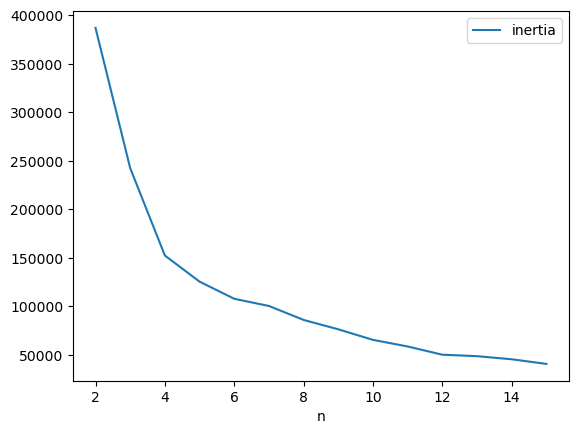

In [80]:
results_df.plot.line(x='n', y='inertia')
plt.show()

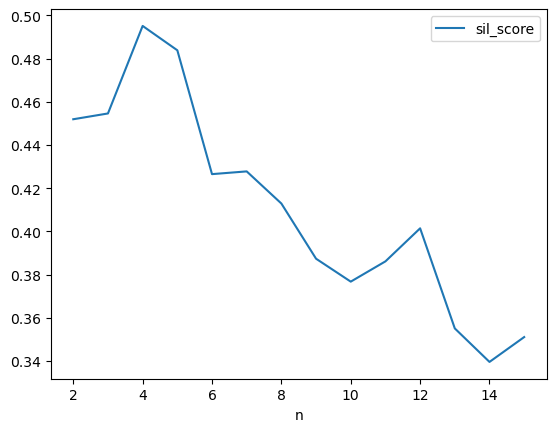

In [81]:
sil_df.plot.line(x='n', y='sil_score')
plt.show()

In [82]:
sil_df.sort_values(by='sil_score')

n  sil_score
0  14   0.339556
0  15   0.351064
0  13   0.355064
0  10   0.376728
0  11   0.386115
0   9   0.387342
0  12   0.401417
0   8   0.412890
0   6   0.426508
0   7   0.427774
0   2   0.451921
0   3   0.454597
0   5   0.483851
0   4   0.495130

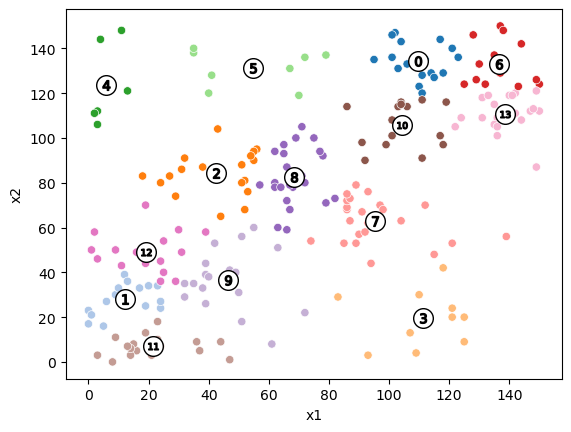

In [83]:
kmeans = KMeans(n_clusters=sil_df.sort_values(by='sil_score')['n'].values[0], random_state=0, n_init="auto").fit(unsupervised_df[['x1', 'x2']])

fig,ax = plt.subplots()
g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=kmeans.labels_, palette='tab20', legend=False, markers=range(0,10), ax=ax)

centers = kmeans.cluster_centers_

ax.scatter(centers[:,0],centers[:,1],marker='o',c='white',s=200,edgecolor='k')
for i,c in enumerate(centers):
	ax.scatter(c[0],c[1],marker='$%d$'%i,s=50,edgecolor='k')

plt.show()

## DBSCAN

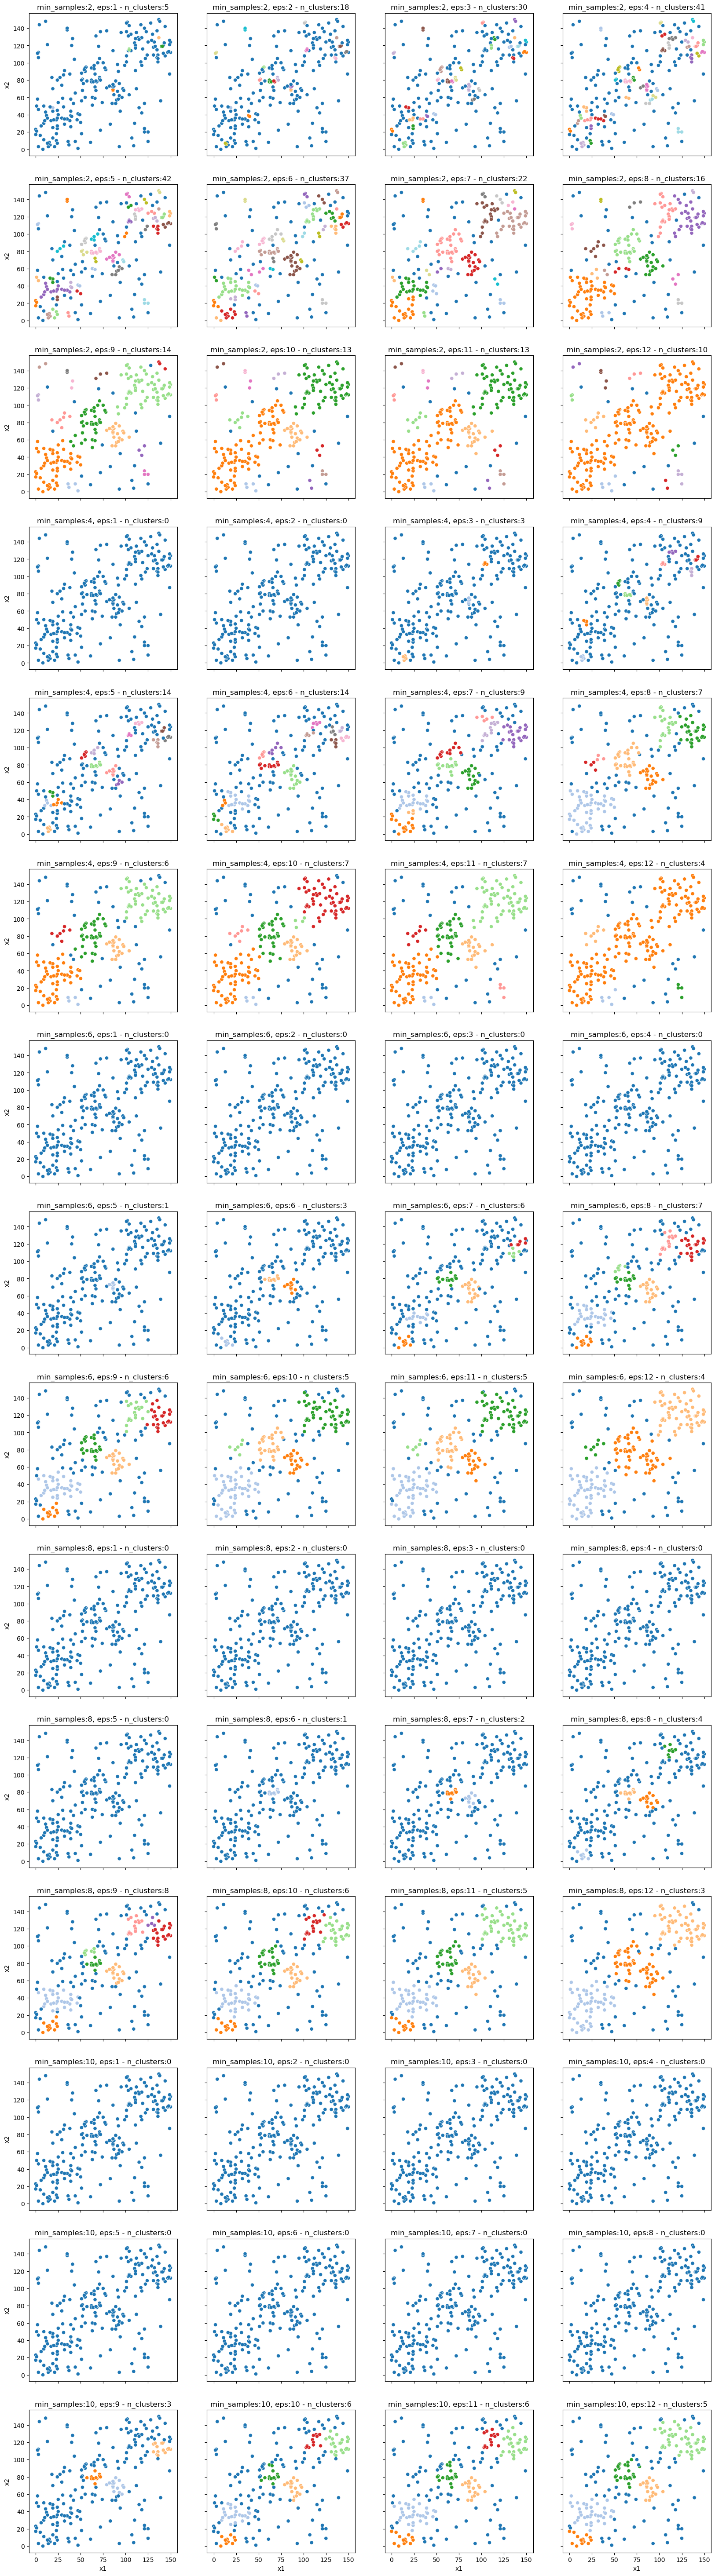

In [84]:
from sklearn.cluster import DBSCAN

db_results = pd.DataFrame()

fig, axs = plt.subplots(figsize=(20,75), nrows=15, ncols=4, sharex=True, sharey=True)
for samp_num in range(0, 5, 1):
    for i in range(0, 12):
        eps_val = i+1
        min_samp_val = (samp_num+1)*2
        dbs = DBSCAN(eps=eps_val, min_samples=min_samp_val).fit(unsupervised_df)
        labels = dbs.labels_
        # print(i)
        g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=False, markers=range(i+1,i), ax=axs[(i//4)+3*samp_num, i%4])
        axs[(i//4)+3*samp_num, i%4].set_title(f"min_samples:{min_samp_val}, eps:{eps_val} - n_clusters:{len(np.unique(labels))-1}")

        db_results = pd.concat([db_results, pd.DataFrame([[min_samp_val, eps_val, len(np.unique(labels))-1]], columns = ["min samples", "eps", "n_clusters"])])
# plt.suptitle("DBSCAN")
# plt.tight_layout()
plt.show()


In [85]:
db_results.reset_index(drop=True).sort_values(by='n_clusters')

min samples  eps  n_clusters
13            4    2           0
24            6    1           0
27            6    4           0
36            8    1           0
37            8    2           0
38            8    3           0
39            8    4           0
40            8    5           0
25            6    2           0
12            4    1           0
26            6    3           0
48           10    1           0
49           10    2           0
50           10    3           0
51           10    4           0
52           10    5           0
53           10    6           0
54           10    7           0
55           10    8           0
28            6    5           1
41            8    6           1
42            8    7           2
14            4    3           3
56           10    9           3
47            8   12           3
29            6    6           3
35            6   12           4
43            8    8           4
23            4   12           4
34            6   11           5
46            8   11           5
33            6   10           5
0             2    1           5
59           10   12           5
30            6    7           6
58           10   11           6
57           10   10           6
32            6    9           6
20            4    9           6
45            8   10           6
31            6    8           7
22            4   11           7
19            4    8           7
21            4   10           7
44            8    9           8
15            4    4           9
18            4    7           9
11            2   12          10
10            2   11          13
9             2   10          13
17            4    6          14
16            4    5          14
8             2    9          14
7             2    8          16
1             2    2          18
6             2    7          22
2             2    3          30
5             2    6          37
3             2    4          41
4             2    5          42

In [86]:
dbs_short_list = db_results[db_results['n_clusters']==3][['min samples', 'eps']].values
dbs_short_list

array([[ 4,  3],
       [ 6,  6],
       [ 8, 12],
       [10,  9]])

In [87]:
[i for i in enumerate(dbs_short_list) ]

[(0, array([4, 3])),
 (1, array([6, 6])),
 (2, array([ 8, 12])),
 (3, array([10,  9]))]

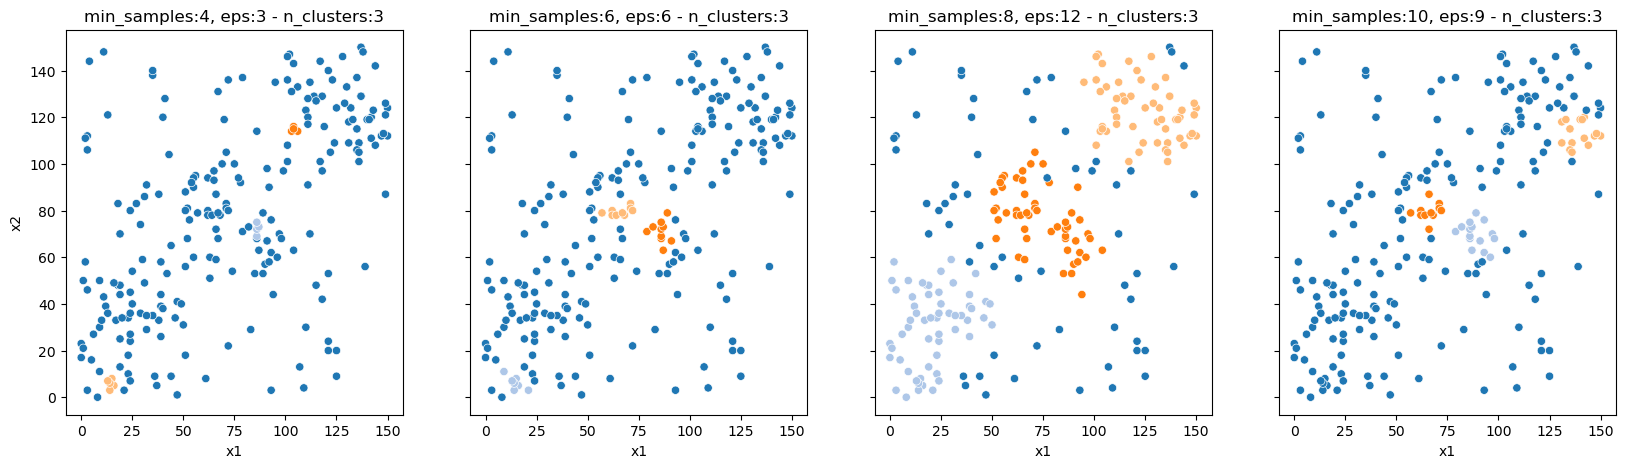

In [88]:
db_len = len(dbs_short_list)

fig_width = db_len*5 if db_len<4 else 20
fig_height = db_len//4+1*5 if db_len >4 else 5 

fig, axs = plt.subplots(figsize=(fig_width, fig_height), nrows=(db_len-1)//4+1, ncols=4 if db_len >=4 else db_len, sharex=True, sharey=True)

for enum, dbs_short_list_val in enumerate(dbs_short_list):
    eps_val = dbs_short_list_val[1]
    min_samp_val = dbs_short_list_val[0]
    dbs = DBSCAN(eps=eps_val, min_samples=min_samp_val).fit(unsupervised_df)
    labels = dbs.labels_
    # print(i)
    
    if db_len>4:
        g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=False, markers=range(i+1,i), ax=axs[(enum//4), enum%4])
        axs[(enum//4), enum%4].set_title(f"min_samples:{min_samp_val}, eps:{eps_val} - n_clusters:{len(np.unique(labels))-1}")
        
    else:
        g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=False, markers=range(i+1,i), ax=axs[enum])
        axs[enum].set_title(f"min_samples:{min_samp_val}, eps:{eps_val} - n_clusters:{len(np.unique(labels))-1}")

    db_results = pd.concat([db_results, pd.DataFrame([[min_samp_val, eps_val, len(np.unique(labels))-1]], columns = ["min samples", "eps", "n_clusters"])])
# plt.suptitle("DBSCAN")
# plt.tight_layout()
plt.show()

## Heirarchical Clustering
- Divisive
- Agglomerative (shown below)

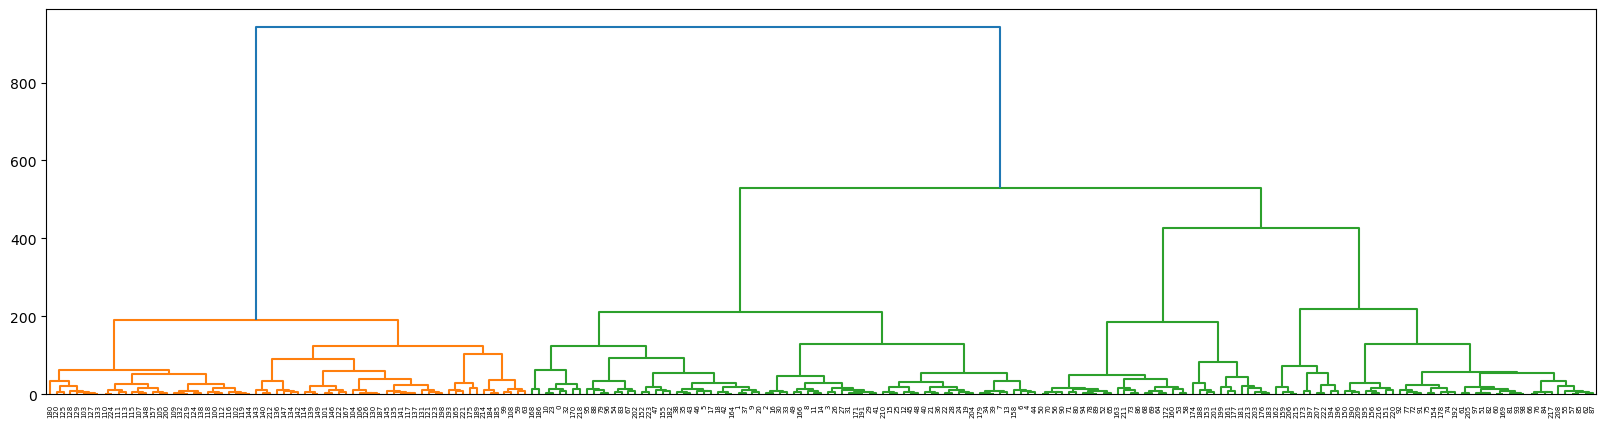

In [89]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agglo = AgglomerativeClustering(n_clusters=10,metric='euclidean',linkage='ward')
agglo.fit(unsupervised_df)
labels = agglo.labels_

###visualization of hierarchies
fig3,ax3 = plt.subplots(figsize=(20,5))
graph = dendrogram(linkage(unsupervised_df,method='ward'))
# ax.set_xticklabels(ax.get_xticklabels(), fontdict={"fontsize":20})
plt.show()

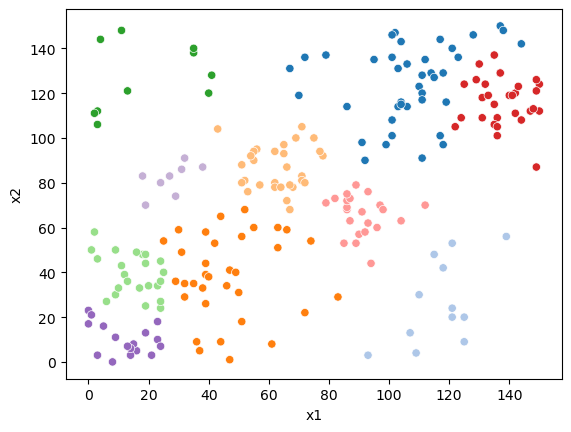

In [90]:
fig,ax = plt.subplots()
g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=labels, palette='tab20', legend=False, markers=range(0,10), ax=ax)

plt.show()